In [2]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing

from matplotlib import pylab as plt
from IPython import display

# Ajustar el tamaño predeterminado de las figuras
plt.rcParams['figure.figsize'] = [4,3] 

from grafica import *
from ClassPerceptron import Perceptron

In [5]:
# Leer FrutasTrain.csv
datos = pd.read_csv(DATOS_DIR + "FrutasTrain.csv")
nColum = list(datos.columns.values)

#--- DATOS DE ENTRENAMIENTO ---
X = np.array(datos.iloc[:,0:2])
normalizarEntrada = 1

if normalizarEntrada:
    # Escala los valores entre 0 y 1
    normalizador = preprocessing.StandardScaler()
    X = normalizador.fit_transform(X)

#--- SALIDA BINARIA ---
T = datos['Clase'] == 'Melon'  #es boolean
T = np.array(T * 1)  #lo convierte en binario

In [6]:
datos

,Diametro,Color,Clase
0,10,200,Naranja
1,20,30,Melon
2,8,150,Naranja
3,26,30,Melon
4,7,170,Naranja
5,24,32,Melon
6,20,170,Naranja
7,21,160,Melon
8,21,180,Naranja
9,23,160,Melon


In [7]:
X

array([[-1.50462909,  0.78461053],
       [ 0.23986841, -1.40200899],
       [-1.85352859,  0.14148715],
       [ 1.2865669 , -1.40200899],
       [-2.02797834,  0.3987365 ],
       [ 0.9376674 , -1.37628405],
       [ 0.23986841,  0.3987365 ],
       [ 0.41431816,  0.27011182],
       [ 0.41431816,  0.52736118],
       [ 0.76321765,  0.27011182],
       [ 0.58876791,  0.65598586],
       [ 0.76321765,  0.65598586],
       [ 0.9376674 ,  1.42773392],
       [-0.63238034, -1.38914652],
       [-0.63238034,  1.42773392],
       [ 0.06541866, -1.38914652]])

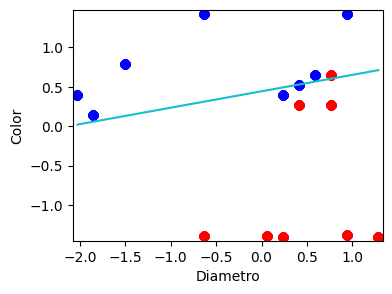

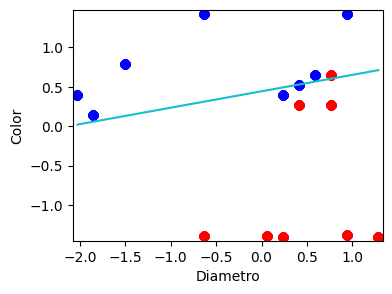

In [29]:
ppn = Perceptron(alpha=0.001, n_iter=100, draw=1, title=nColum[0:2], random_state=None)
ppn.fit(X, T)

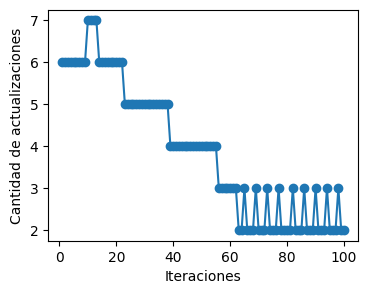

In [30]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

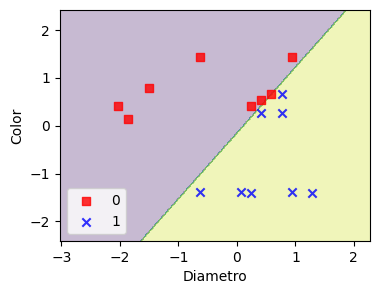

In [16]:
from PlotRegiones import plot_decision_regions

plot_decision_regions(X, T, classifier=ppn)
plt.xlabel(ppn.title[0])
plt.ylabel(ppn.title[1])
plt.legend(loc='lower left')
plt.show()

In [9]:
Y = ppn.predict(X)
print("Y = ", Y)
print("T = ", T)
aciertos = sum(Y == T)
print("aciertos = ", aciertos)
nAciertos = sum(Y==T)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X.shape[0]))


Y =  [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
T =  [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
aciertos =  16
% de aciertos = 100.00 %


In [10]:
# Leemos los datos de testeo
df = pd.read_csv(DATOS_DIR + "FrutasTest.csv")
print(df)

# ejemplos para ingresar al perceptrón ya entrenado
X_test = np.array(df.iloc[:,0:2])

if normalizarEntrada:
    X_test = normalizador.transform(X_test)
    print("Datos normalizados")
    print(X_test)

#--- slaida esperada (sólo para comparar con la respuesta del perceptrón) ---
T_test = (df['Clase'] == 'Melon') * 1  #es boolean
T_test = np.array(T_test * 1)  #lo convierte en binario

   Diametro  Color    Clase
0         7    100  Naranja
1        20     20    Melon
2        25     70    Melon
3        10    210  Naranja
Datos normalizados
[[-2.02797834 -0.50163624]
 [ 0.23986841 -1.53063367]
 [ 1.11211715 -0.88751028]
 [-1.50462909  0.91323521]]


In [11]:
# veamos qué responde el perceptrón para cada ejemplo de testeo
Y_test = ppn.predict(X_test)
print("Y = ", Y_test)
print("T = ", T_test)
aciertos = sum(Y_test == T_test)
print("aciertos = ", aciertos)
nAciertos = sum(Y_test==T_test)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X_test.shape[0]))

Y =  [0 1 1 0]
T =  [0 1 1 0]
aciertos =  4
% de aciertos = 100.00 %
